In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns


In [2]:
deaths = pd.read_csv('/Users/jimy/Desktop/FINAL-PROJECT/data/deaths.csv')
expeditions = pd.read_csv('/Users/jimy/Desktop/FINAL-PROJECT/data/expeditions.csv')
peaks = pd.read_csv('/Users/jimy/Desktop/FINAL-PROJECT/data/peaks.csv')
campeones = pd.read_csv('/Users/jimy/Desktop/FINAL-PROJECT/data/summiters.csv')

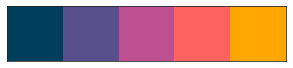

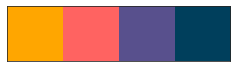

In [40]:
# Create my own palette

# Create an array with the colors you want to use
colors1 = ["#F1D302","#DFAB00","#00DFAC","#0099DF", "#C600DF","#DF0022"]  #https://galactic.ink/sphere/#
colors = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"]
# Set your custom color palette
my_palette = sns.color_palette(colors)
sns.set_palette(my_palette)
# Show the palette
sns.palplot(my_palette)

seasonal_colors = ['#ffa600', '#ff6361', '#58508d','#003f5c']
# Set your custom color palette
seasonal_palette = sns.color_palette(seasonal_colors)
sns.set_palette(seasonal_palette)
# Show the palette
sns.palplot(seasonal_palette)

# DEATHS

In [3]:
deaths.head()

,peak_id,peak_name,name,date,time,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death,height_of_death_(m),year,season
0,AMAD,Ama Dablam,Michael John (Mike) Harris,May 21,08:30,UK,M,33,No,.,Fall,6550,1959,Spring
1,AMAD,Ama Dablam,George James Fraser,May 21,08:30,UK,M,27,No,.,Fall,6550,1959,Spring
2,AMAD,Ama Dablam,Kenneth James (Ken) Hyslop,Oct 24,11:15,New Zealand,M,23,No,.,Avalanche,6100,1979,Autumn
3,AMAD,Ama Dablam,Guido Bumann,Oct 27,20:00,Switzerland,M,31,No,.,Fall,5300,1983,Autumn
4,AMAD,Ama Dablam,Maya Senn,Oct 27,20:00,Switzerland,F,28,No,.,Fall,5300,1983,Autumn


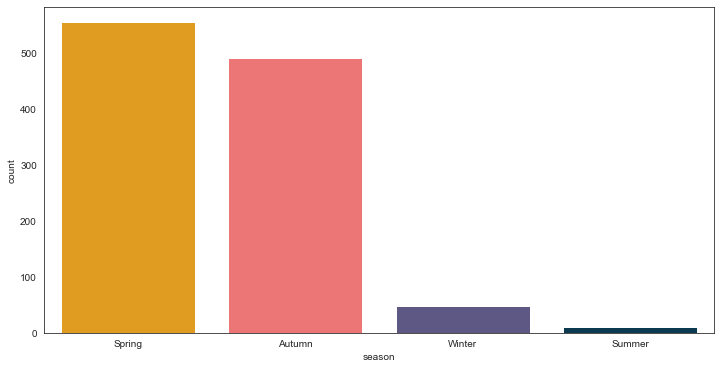

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(x=deaths.season);

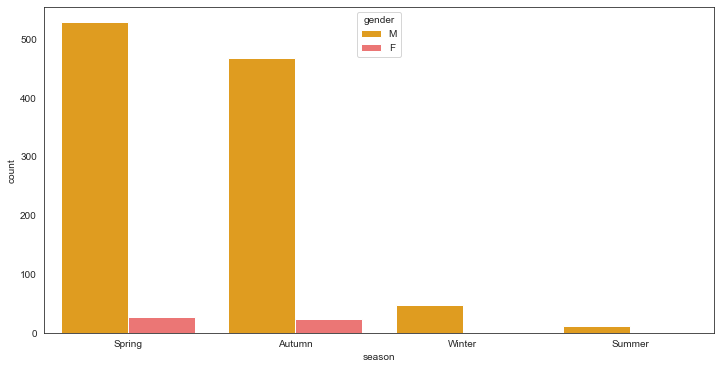

In [96]:
plt.figure(figsize=(12, 6))
sns.countplot(x=deaths.season, hue=deaths.gender);

In [6]:
deaths.loc[(deaths['age'] > 0)].mean()

age                      36.077670
height_of_death_(m)    6545.075512
year                   1994.829558
dtype: float64

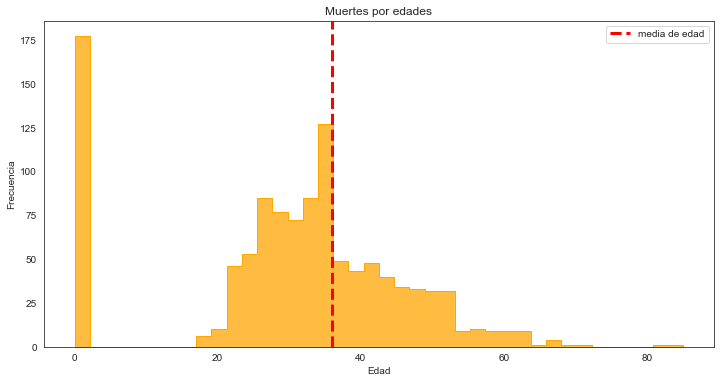

In [45]:
plt.figure(figsize=(12, 6))

sns.histplot(x=deaths.age,
             bins=40,
             element='step');   


plt.axvline(36,
            c='r',
            linewidth=3.,
            linestyle='--',
            label='media de edad')

plt.title('Muertes por edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
#plt.savefig('histograma.png')
plt.show();

# EXPEDITIONS

In [8]:
expeditions.head()

,peak_id,peak_name,nationality,year,season,host_cntr,other_cntrs,leaders,rte_1_name,is_disputed,...,is_o2_not_used,is_o2_climbing,is_o2_descent,is_o2_sleeping,is_o2_medical,is_o2_used,is_o2_unkwn,had_o2,camp_sites,members
0,ACHN,Aichyn,Japan,2015,Autumn,Nepal,Unknown,Hiroki Senda,NW side,0,...,1,0,0,0,0,0,0,0,"Smt(03,08/09)","01 Hiroki (Yuki) Senda (L)(S), Japan 02 Ms. ..."
1,ACHN,Aichyn,France,2015,Autumn,Nepal,Unknown,Paulo Grobel,N Ridge-W Ridge,0,...,1,0,0,0,0,0,0,0,Smt(25/09),"01 Paul Marc (Paulo) Grobel (L)(S), France 02..."
2,ACHN,Aichyn,France,2018,Autumn,Nepal,Unknown,"Francois Damilano, Gregoire Lestienne",-,0,...,1,0,0,0,0,0,0,0,Unknown,"01 Francois Damilano (L), France 02 Gregoire..."
3,AMAD,Ama Dablam,UK,1958,Autumn,Nepal,Italy,Alfred Gregory,SW Ridge,0,...,1,0,0,0,0,0,0,0,"BC,C1,C2,xxx(6000m)","01 Alfred John (Alf) Gregory (L), UK 02 Rich..."
4,AMAD,Ama Dablam,UK,1959,Spring,Nepal,Unknown,J. H. Emlyn Jones,N Ridge-NE Spur,0,...,1,0,0,0,0,0,0,1,"BC(17/04,5030m),C1(01/05,5440m),C2(05/05,5850m...","01 John Hubert Emlyn Jones (L), UK 02 George..."


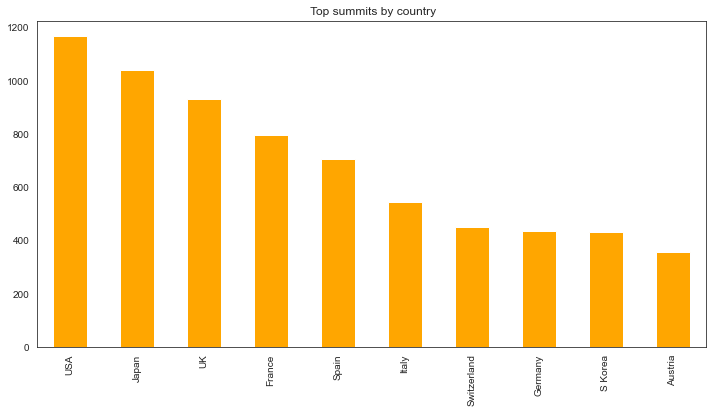

In [46]:
expeditions.nationality.value_counts()[:10].plot(kind='bar', title= ' Top summits by country', figsize=(12,6));

In [14]:
# Grouping data

# Expeditions by peak
n_exped_by_peak = expeditions[['peak_name','peak_id']].groupby(by='peak_name',as_index=False).count()


# Expeditions by year
n_exped_by_year = expeditions[['year','peak_id']].groupby(by='year',as_index=False).count()


#Expeditions by year and peak
n_exped_by_year_peak = expeditions[['year','peak_name','peak_id']].groupby(by=['year', 'peak_name'],as_index=False).count()


#Expeditions by season and peak
n_exped_by_season_peak = expeditions[['season', 'peak_name', 'peak_id']].groupby(by=['season','peak_name'],as_index=False).count()


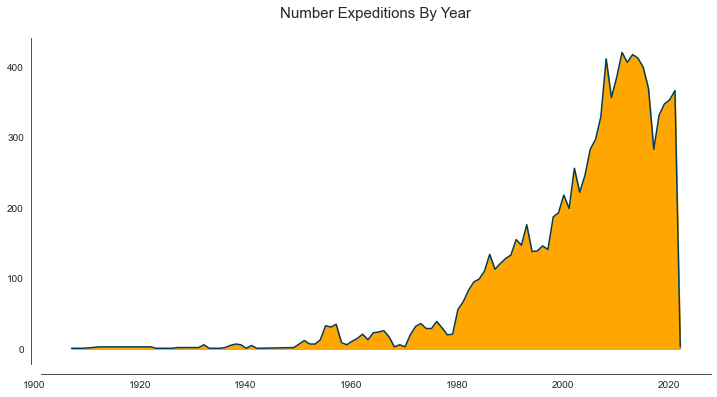

In [17]:
sns.set_style("white")
plt.figure(figsize = (12, 6))
sns.lineplot(x = n_exped_by_year['year'], y = n_exped_by_year['peak_id'], data = n_exped_by_year, color = "#003f5c")
sns.despine(left = False, offset = 10);
plt.title("Number Expeditions By Year", pad = 20, fontsize=15)
plt.ylabel("")
plt.xlabel("")
plt.xticks(rotation = 0, ha = 'right')
plt.fill_between(n_exped_by_year.year.values, n_exped_by_year.peak_id.values, color = "#ffa600")
plt.show()

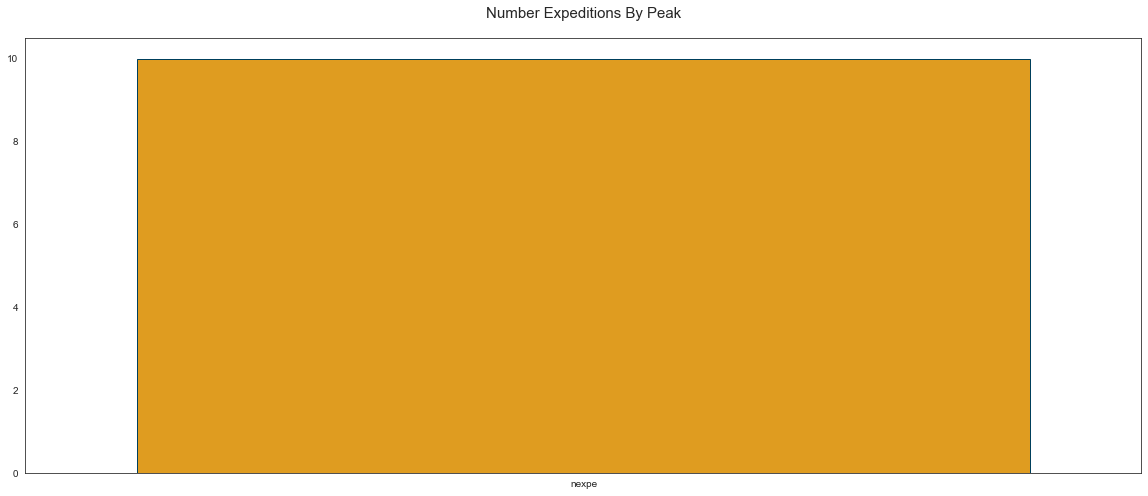

In [114]:
sns.set_style("white")
plt.figure(figsize = (20, 8))
sns.countplot( data = mas, color = "#ffa600", edgecolor = "#003f5c")


plt.title("Number Expeditions By Peak", pad = 20, fontsize=15)
plt.ylabel("")
plt.xlabel("")
plt.show()


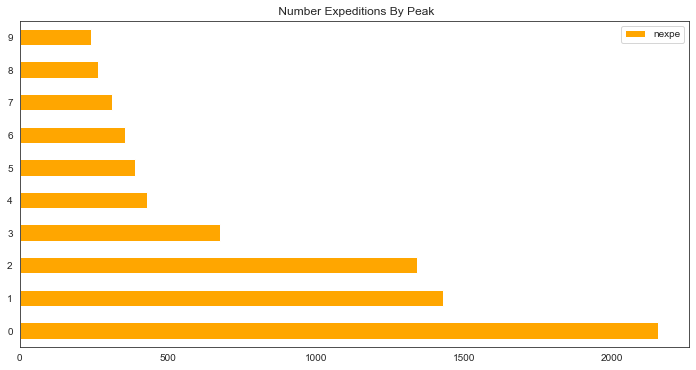

In [113]:
mas.plot(kind='barh', title= ' Number Expeditions By Peak', figsize=(12,6));

In [ ]:
# Create dataframe with expeditions by peak and season
exped_peak_season = pd.pivot_table(n_exped_by_season_peak, values = 'NEXPED',\
                                   index = 'SEASON', columns = ['PKNAME'],\
                                   aggfunc = np.sum, fill_value = 0)
exped_peak_season


In [25]:
expeditions[:50]

,peak_id,peak_name,nationality,year,season,host_cntr,other_cntrs,leaders,rte_1_name,is_disputed,...,is_o2_not_used,is_o2_climbing,is_o2_descent,is_o2_sleeping,is_o2_medical,is_o2_used,is_o2_unkwn,had_o2,camp_sites,members
0,ACHN,Aichyn,Japan,2015,Autumn,Nepal,Unknown,Hiroki Senda,NW side,0,...,1,0,0,0,0,0,0,0,"Smt(03,08/09)","01 Hiroki (Yuki) Senda (L)(S), Japan 02 Ms. ..."
1,ACHN,Aichyn,France,2015,Autumn,Nepal,Unknown,Paulo Grobel,N Ridge-W Ridge,0,...,1,0,0,0,0,0,0,0,Smt(25/09),"01 Paul Marc (Paulo) Grobel (L)(S), France 02..."
2,ACHN,Aichyn,France,2018,Autumn,Nepal,Unknown,"Francois Damilano, Gregoire Lestienne",-,0,...,1,0,0,0,0,0,0,0,Unknown,"01 Francois Damilano (L), France 02 Gregoire..."
3,AMAD,Ama Dablam,UK,1958,Autumn,Nepal,Italy,Alfred Gregory,SW Ridge,0,...,1,0,0,0,0,0,0,0,"BC,C1,C2,xxx(6000m)","01 Alfred John (Alf) Gregory (L), UK 02 Rich..."
4,AMAD,Ama Dablam,UK,1959,Spring,Nepal,Unknown,J. H. Emlyn Jones,N Ridge-NE Spur,0,...,1,0,0,0,0,0,0,1,"BC(17/04,5030m),C1(01/05,5440m),C2(05/05,5850m...","01 John Hubert Emlyn Jones (L), UK 02 George..."
5,AMAD,Ama Dablam,New Zealand,1961,Spring,Nepal,"UK, USA",Edmund Hillary,SW Ridge,0,...,1,0,0,0,0,0,0,0,"BC(4575m),C1(5800m),C2,C3,C4,Smt(13/03)","01 Edmund Percival Hillary (L), New Zealand 0..."
6,AMAD,Ama Dablam,France,1978,Autumn,Nepal,Unknown,Jean Clemenson,SW Ridge,0,...,1,0,0,0,0,0,0,1,"BC(01/10,4950m),C1(11/10,5650m),xxx(20-21/10,6...","01 Jean Robert Clemenson (L), France 02 Bern..."
7,AMAD,Ama Dablam,USA,1979,Spring,Nepal,W Germany,Roger C. Brown,SW Ridge,0,...,1,0,0,0,0,0,0,1,"BC(29/03,4600m),ABC(03/04,5000m),C1(05/04,5750...","01 Roger C. Brown (L), USA 02 Thomas McCalla..."
8,AMAD,Ama Dablam,France,1979,Autumn,Nepal,Unknown,Raymond Renaud,N Ridge,0,...,1,0,0,0,0,0,0,1,"BC(25/09,5100m),C1(01/10,5850m),C2(08/10,6000m...","01 Jean Francois Manificat (L)(S), France 02 ..."
9,AMAD,Ama Dablam,New Zealand,1979,Autumn,Nepal,Unknown,Peter Hillary,W Face,0,...,1,0,0,0,0,0,0,0,"BC(15/10,4575m),C1(17/10,5500m),xxx(24/10,6100m)","01 Peter Edmund Hillary (L), New Zealand 02 ..."


In [83]:
mas= pd.DataFrame((expeditions['peak_name'].value_counts()[:10]))
mas['Peak']=mas.index
mas.reset_index(drop=True, inplace=True)
mas.rename(columns={'peak_name': 'nexpe'}, inplace=True)
mas.rename(columns={'Peak': 'peak_name'}, inplace=True)


,peak_name,nexpe
0,2155,Everest
1,1429,Ama Dablam
2,1341,Cho Oyu
3,677,Manaslu
4,430,Lhotse
5,389,Dhaulagiri I
6,356,Makalu
7,311,Baruntse
8,265,Pumori
9,242,Annapurna I


In [100]:
mas.columns=['nexpe', 'peak_name']
mas=mas[['peak_name', 'nexpe']]
mas

,peak_name,nexpe
0,Everest,2155
1,Ama Dablam,1429
2,Cho Oyu,1341
3,Manaslu,677
4,Lhotse,430
5,Dhaulagiri I,389
6,Makalu,356
7,Baruntse,311
8,Pumori,265
9,Annapurna I,242


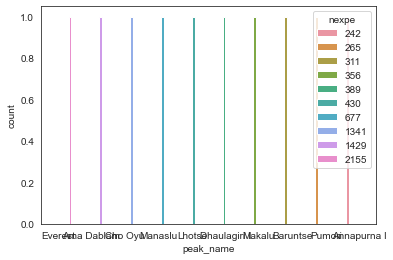

In [101]:
sns.countplot(x=mas.peak_name, hue=mas.nexpe);

# PEAKS

In [10]:
peaks.head()

,peak_id,peak_name,host_contries,height_m,height_ft,location,region,climb_status,is_open,is_unlisted,is_trekking,trek_year,first_asc_yr,first_asc_season,first_asc_date,countries,first_summiters
0,ACHN,Aichyn,Nepal only,6055,19865,Nalakankar/Chandi/Changla,Far West-Kanjiroba,Climbed,1,0,0,0,2015,Autumn,Sep 03,Japan,"Hiroki Senda, et al"
1,AGLE,Agole East,Nepal only,6675,21900,Rolwaling,Khumbu-Rolwaling-Makalu,Unclimbed,1,0,0,0,0,All,Unknown,Unknown,Unclimbed
2,AMAD,Ama Dablam,Nepal only,6814,22356,Khumbu,Khumbu-Rolwaling-Makalu,Climbed,1,0,0,0,1961,Spring,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae..."
3,AMOT,Amotsang,Nepal only,6393,20974,Damodar,Annapurna-Damodar-Peri,Climbed,1,0,0,0,2019,Autumn,Oct 24,Germany,Jost Kobusch
4,AMPG,Amphu Gyabjen,Nepal only,5630,18471,Khumbu,Khumbu-Rolwaling-Makalu,Climbed,1,0,0,0,1953,Spring,Apr 11,UK,"John Hunt, Tom Bourdillon"


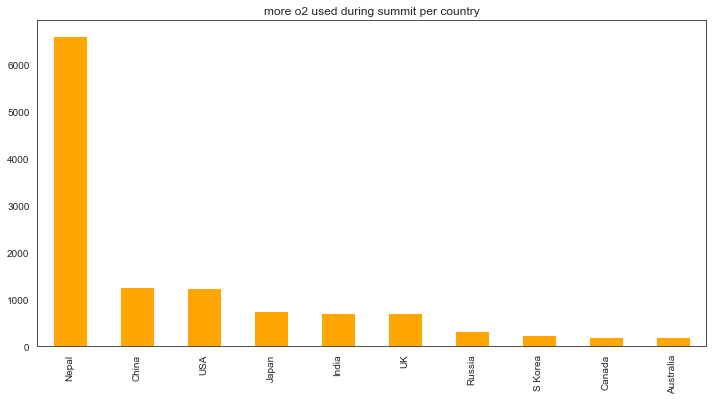

In [60]:
used_o2 = campeones[campeones['is_o2_used']=='Y']


used_o2.citizenship.value_counts()[:10].plot(kind='bar', title= 'more o2 used during summit per country', figsize=(12,6));

In [13]:
# Filter 8000 m peaks

ochomiles = peaks[peaks['height_m'] >= 8000]
ochomiles['peak_name']

8                Annapurna I
12          Annapurna I East
13        Annapurna I Middle
51                   Cho Oyu
68              Dhaulagiri I
92                   Everest
173    Kangchenjunga Central
175            Kangchenjunga
177      Kangchenjunga South
237            Lhotse Middle
238                   Lhotse
251              Lhotse Shar
260                   Makalu
262                  Manaslu
450              Yalung Kang
451         Yalung Kang West
Name: peak_name, dtype: object

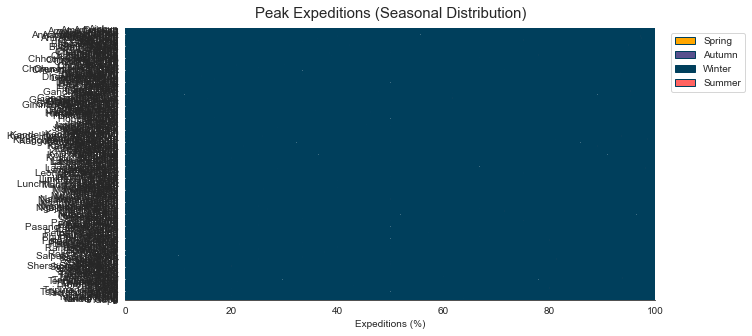

In [59]:
#Total expeditions by peak
total_peak = expeditions.groupby('peak_name')['peak_id'].count().reset_index()

#Total expeditions by peak for each season
summer = expeditions[expeditions['season']=='Summer'].groupby('peak_name')['peak_id'].count().reset_index()
winter = expeditions[expeditions['season']=='Winter'].groupby('peak_name')['peak_id'].count().reset_index()
spring = expeditions[expeditions['season']=='Spring'].groupby('peak_name')['peak_id'].count().reset_index()
autumn = expeditions[expeditions['season']=='Autumn'].groupby('peak_name')['peak_id'].count().reset_index()

#For each season series add total_peak
summer = summer.merge(total_peak, on='peak_name', how = 'left')
winter = winter.merge(total_peak, on='peak_name', how = 'left')
spring = spring.merge(total_peak, on='peak_name', how = 'left')
autumn = autumn.merge(total_peak, on='peak_name', how = 'left')

#Calculate %
summer['Summer'] = summer['peak_id_x'] / summer['peak_id_y'] * 100 
winter['Winter'] = winter['peak_id_x'] / winter['peak_id_y'] * 100 
spring['Spring'] = spring['peak_id_x'] / spring['peak_id_y'] * 100 
autumn['Autumn'] = autumn['peak_id_x'] / autumn['peak_id_y'] * 100 


#Merge data from season series into 
total_peak = total_peak.merge(spring, on='peak_name', how = 'left').merge(autumn, on='peak_name', how = 'left')\
             .merge(winter, on='peak_name', how = 'left').merge(summer, on='peak_name', how = 'left')\
             [['peak_name','Spring','Autumn','Winter','Summer']].set_index('peak_name').sort_index(ascending=False)

#Figure
ax = total_peak.plot(kind="barh", stacked=True, figsize=(9.5,5), xlim=[0,100],\
           color = ['#ffa600', '#58508d','#003f5c','#ff6361'],edgecolor='#003f5c')
ax.set_title('Peak Expeditions (Seasonal Distribution)', fontsize = 15, pad = 10)
ax.set_xlabel("Expeditions (%)")
ax.set_ylabel("")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.legend(bbox_to_anchor=(1.02, 1.0));

# CAMPEONES

In [12]:
campeones.head()

,peak_id,peak_name,name,date,time,citizenship,gender,age,is_o2_used,died_on_descent,host_country,year,season
0,ACHN,Aichyn,Kaya Ko,Sep 03,13:15,Japan,F,23,No,.,Nepal,2015,Aut
1,ACHN,Aichyn,Yuma Ono,Sep 03,13:15,Japan,M,19,No,.,Nepal,2015,Aut
2,ACHN,Aichyn,Shintaro Saito,Sep 03,13:15,Japan,M,25,No,.,Nepal,2015,Aut
3,ACHN,Aichyn,Hiroki (Yuki) Senda,Sep 03,13:15,Japan,M,23,No,.,Nepal,2015,Aut
4,ACHN,Aichyn,Yuto Tamaki,Sep 03,13:15,Japan,M,22,No,.,Nepal,2015,Aut
